In [16]:
import os
import cv2
import matplotlib.pyplot as plt

train_image_name = '000004'

def read_train_image(name: str = None):
    images_root = '../data/kitti/train/images/'
    
    if name is None:
        files = os.listdir(images_root)
        is_image = lambda filename : filename.endswith('.png')
        image_filenames = list(
            filter(
                is_image,
                files
            )
        )
        filename = image_filenames[0]
    else:
        filename = f'{name}.png'

    path = os.path.join(images_root, filename)
    img = cv2.imread(path)
    # plt.imshow(img);
    return img

img = read_train_image(train_image_name)

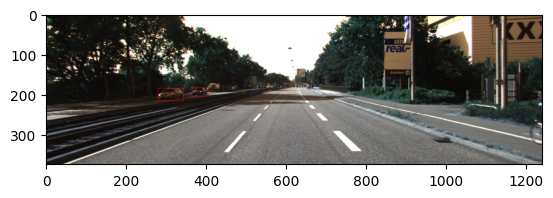

In [19]:
# For meaning of the label data:
# https://github.com/bostondiditeam/kitti/blob/master/resources/devkit_object/readme.txt

def read_labels(name: str):
    labels_root = '../data/kitti/train/labels/'

    with open(os.path.join(labels_root, f'{name}.txt')) as file:
        lines = file.read().split(f'\n')
        cars = []
        for line in lines:
            tokens = line.split(' ')
            if tokens[0] == 'Car':
                xmin = int(float(tokens[4]))
                ymin = int(float(tokens[5]))
                xmax = int(float(tokens[6]))
                ymax = int(float(tokens[7]))
                cars.append((xmin, ymin, xmax, ymax))

    return cars


cars = read_labels(train_image_name)

for car in cars:
    img = cv2.rectangle(img, car[:2], car[2:], color=(255,0,0))

plt.imshow(img);